<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Lightgbm" data-toc-modified-id="Lightgbm-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Lightgbm</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Нейронная-сеть" data-toc-modified-id="Нейронная-сеть-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Нейронная сеть</a></span></li></ul></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></div>

# Телеком

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

*Описание услуг*

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

*Описание данных*

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## Подготовка данных

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [46]:
try:
    contract=pd.read_csv(r'C:\Users\Susanna\Downloads\contract.csv')
except:
    contract=pd.read_csv(r'/datasets/final_provider/contract.csv')

display(contract.head())
contract.info()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [47]:
try:
    personal=pd.read_csv(r'C:\Users\Susanna\Downloads\personal.csv')
except:
    personal=pd.read_csv(r'/datasets/final_provider/personal.csv')

display(personal.head())
personal.info()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [48]:
try:
    internet=pd.read_csv(r'C:\Users\Susanna\Downloads\internet.csv')
except:
    internet=pd.read_csv(r'/datasets/final_provider/internet.csv')


display(internet.head())
internet.info()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [49]:
try:
    phone=pd.read_csv(r'C:\Users\Susanna\Downloads\phone.csv')
except:
    phone=pd.read_csv(r'/datasets/final_provider/phone.csv')


display(phone.head())
phone.info()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Объеденю все таблицы в одну для удобства:

In [50]:
cont_per=pd.merge(contract, personal, how='left', on=['customerID'])
cont_per_phone=pd.merge(cont_per, phone, how='left', on=['customerID'])
df=pd.merge(cont_per_phone, internet, how='left', on=['customerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


In [51]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


<b> Вывод </b>  
 У нас есть данные о 7043 пользователях. 5174 являюся клиентами компании, 1869 уже расторгли договара.  
 Изучу подробнее признаки, изменю тип данных где это необходимо.

Посмотрю какие значение принимают категориальные признаки:

In [52]:
def value_counts(sign):
    print(df[sign].value_counts().sort_values())
    
value_counts('Type')

One year          1473
Two year          1695
Month-to-month    3875
Name: Type, dtype: int64


In [53]:
for i in df.drop(['customerID', 'BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges'], axis=1).columns:
    print(value_counts(i))
    print()

One year          1473
Two year          1695
Month-to-month    3875
Name: Type, dtype: int64
None

No     2872
Yes    4171
Name: PaperlessBilling, dtype: int64
None

Credit card (automatic)      1522
Bank transfer (automatic)    1544
Mailed check                 1612
Electronic check             2365
Name: PaymentMethod, dtype: int64
None

Female    3488
Male      3555
Name: gender, dtype: int64
None

1    1142
0    5901
Name: SeniorCitizen, dtype: int64
None

Yes    3402
No     3641
Name: Partner, dtype: int64
None

Yes    2110
No     4933
Name: Dependents, dtype: int64
None

Yes    2971
No     3390
Name: MultipleLines, dtype: int64
None

DSL            2421
Fiber optic    3096
Name: InternetService, dtype: int64
None

Yes    2019
No     3498
Name: OnlineSecurity, dtype: int64
None

Yes    2429
No     3088
Name: OnlineBackup, dtype: int64
None

Yes    2422
No     3095
Name: DeviceProtection, dtype: int64
None

Yes    2044
No     3473
Name: TechSupport, dtype: int64
None

Yes    2707


In [54]:
df.describe()

,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


In [55]:
value_counts('EndDate')

2019-10-01 00:00:00     458
2020-01-01 00:00:00     460
2019-12-01 00:00:00     466
2019-11-01 00:00:00     485
No                     5174
Name: EndDate, dtype: int64


Интересно что все контракты были расторгнуты в 4 дня: 1.01.20 и 10, 11 и 12 января 2019.  


Создам новый столбец <b>days_count</b> с кол-вом дней с  «Ниединогоразрыва.ком»: 

In [56]:
#Созадам доп. столбец EndDate2
def EndDate(row):
    if row['EndDate']=='No':
        return '2020-02-01 00:00:00'
    else:
        return row['EndDate']
df['EndDate2']=df.apply(EndDate, axis=1)

In [57]:
#Замена типов данных
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['BeginDate']= pd.to_datetime(df['BeginDate'], format='%Y-%m-%d') 
df['EndDate2']= pd.to_datetime(df['EndDate2'], format='%Y-%m-%d %H:%M:%S') 

In [58]:
df['days_count']=df['EndDate2']-df['BeginDate']
df['days_count']=(df['days_count']).dt.days

Создам целевой столбец <b>target</b>:

In [59]:
def Target(row):
    if row['EndDate']=='No':
        return 0
    else:
        return 1
df['target']=df.apply(Target, axis=1)

In [60]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,EndDate2,days_count,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,DSL,No,Yes,No,No,No,No,2020-02-01,31,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,...,DSL,Yes,No,Yes,No,No,No,2020-02-01,1036,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,DSL,Yes,Yes,No,No,No,No,2019-12-01,61,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,2020-02-01,1371,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,Fiber optic,No,No,No,No,No,No,2019-11-01,61,1


In [61]:
print('Всего расторгли договор с компанией {:.2%}' .format(len(df.query('target==1'))/len(df)), 'пользователей.')

Всего расторгли договор с компанией 26.54% пользователей.


Построю гистограммы MonthlyCharges и days_count отдельно для пользователей которые еще пользуются услугами Ниединогоразрыва.ком и для тех кто уже ушел.

In [62]:
def hist(bins, sign, target, title):
    df2=df.query(target)
    df2.hist(sign, bins=bins, figsize=(10,5))
    plt.title(title)
    plt.show()
    print('Минимальное значение',sign, df2[sign].min())
    print('Среднее значение',sign, df2[sign].mean())
    print('Максимальное значение',sign, df2[sign].max())

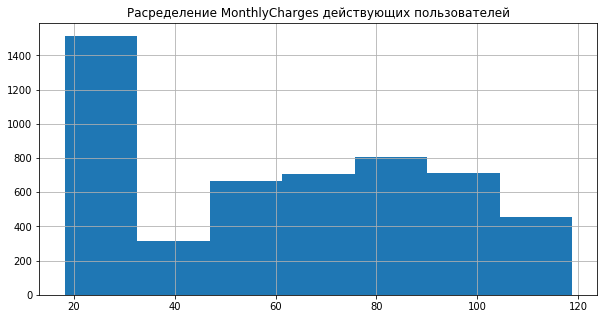

Минимальное значение MonthlyCharges 18.25
Среднее значение MonthlyCharges 61.2651236953999
Максимальное значение MonthlyCharges 118.75


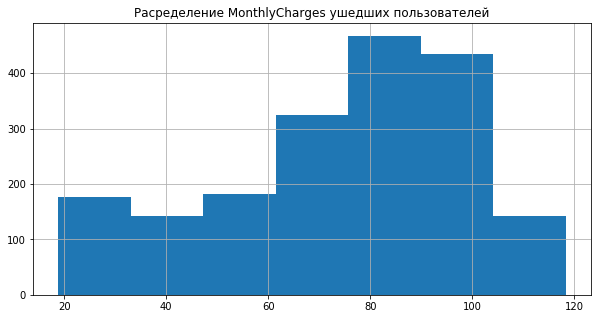

Минимальное значение MonthlyCharges 18.85
Среднее значение MonthlyCharges 74.4413322632423
Максимальное значение MonthlyCharges 118.35


In [63]:
hist(7, 'MonthlyCharges', 'target==0', 'Расределение MonthlyCharges действующих пользователей')
hist(7, 'MonthlyCharges', 'target==1', 'Расределение MonthlyCharges ушедших пользователей')

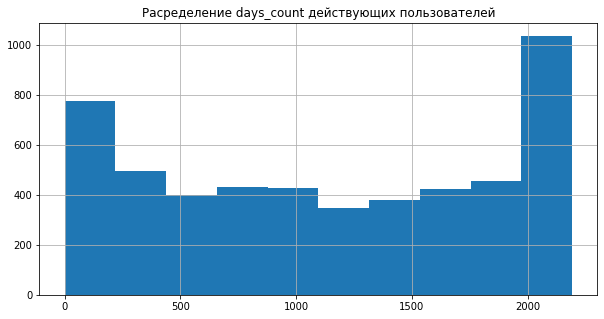

Минимальное значение days_count 0
Среднее значение days_count 1144.4472361809046
Максимальное значение days_count 2191


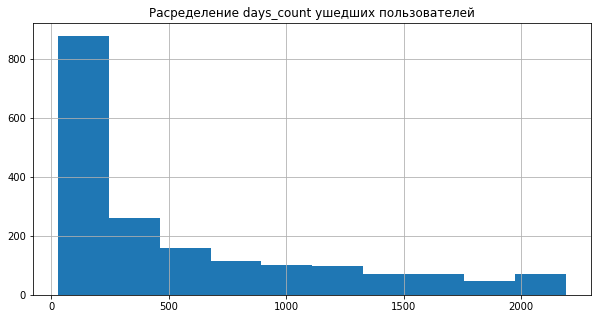

Минимальное значение days_count 30
Среднее значение days_count 547.3520599250936
Максимальное значение days_count 2191


In [64]:
hist(10, 'days_count', 'target==0', 'Расределение days_count действующих пользователей')
hist(10, 'days_count', 'target==1', 'Расределение days_count ушедших пользователей')

<b>Вывод</b>  
Большинство действующих пользователей платит минимальную ежемесячную оплату.  
Большинство ушедших пользователей были с компанией недолго, менее года. В тоже время из текущих пользователей большинство уже более 5 лет платит за услуги связи, но также есть и много новых действующих пользователей.   

In [65]:
def pivot_func(column):
    df_pivot=df.pivot_table(index=column, values='target', aggfunc=['count','sum']).reset_index()
    df_pivot.columns=[column, 'count','left']
    df_pivot['%_left']=df_pivot['left']/df_pivot['count']
    df_pivot=df_pivot.sort_values(by='%_left',ascending=False).reset_index(drop=True)
    print()
    display(df_pivot)

pivot_func('PaperlessBilling')
pivot_func('PaymentMethod')
pivot_func('SeniorCitizen')
pivot_func('Partner')
pivot_func('Dependents')
pivot_func('MultipleLines')
pivot_func('InternetService')
pivot_func('OnlineSecurity')
pivot_func('OnlineBackup')
pivot_func('DeviceProtection')
pivot_func('TechSupport')
pivot_func('StreamingTV')
pivot_func('StreamingMovies')


,PaperlessBilling,count,left,%_left
0,Yes,4171,1400,0.335651
1,No,2872,469,0.163301


,PaymentMethod,count,left,%_left
0,Electronic check,2365,1071,0.452854
1,Mailed check,1612,308,0.191067
2,Bank transfer (automatic),1544,258,0.167098
3,Credit card (automatic),1522,232,0.152431


,SeniorCitizen,count,left,%_left
0,1,1142,476,0.416813
1,0,5901,1393,0.236062


,Partner,count,left,%_left
0,No,3641,1200,0.329580
1,Yes,3402,669,0.196649


,Dependents,count,left,%_left
0,No,4933,1543,0.312791
1,Yes,2110,326,0.154502


,MultipleLines,count,left,%_left
0,Yes,2971,850,0.286099
1,No,3390,849,0.250442


,InternetService,count,left,%_left
0,Fiber optic,3096,1297,0.418928
1,DSL,2421,459,0.189591


,OnlineSecurity,count,left,%_left
0,No,3498,1461,0.417667
1,Yes,2019,295,0.146112


,OnlineBackup,count,left,%_left
0,No,3088,1233,0.399288
1,Yes,2429,523,0.215315


,DeviceProtection,count,left,%_left
0,No,3095,1211,0.391276
1,Yes,2422,545,0.225021


,TechSupport,count,left,%_left
0,No,3473,1446,0.416355
1,Yes,2044,310,0.151663


,StreamingTV,count,left,%_left
0,No,2810,942,0.335231
1,Yes,2707,814,0.300702


,StreamingMovies,count,left,%_left
0,No,2785,938,0.336804
1,Yes,2732,818,0.299414


Всего расторгли договор 27% пользователей.  
Среди людей, которые пользовались методом оплаты Electronic check ушло 45% пользователей. Это много, возможно что-то не так с этим методом оплаты...  
Среди пользователей со статусом SeniorCitizen  ушли 42%.  
Также большие оттоки клиентов (42%) замечены среди тех, кто пользовался подключением по оптоволоконному кабелю. В тоже время среди поользующихся DSL ушло менее 20%.   
Ушли 42 % тех, кто не пользовался услугой OnlineSecurity. Да и в целом среди тех, кто использовал доп услуги, ушло меньше людей.  



In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  MultipleLines     6361 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

Заменю пропуски в категориальных признаках на "No_info". Позже они будут переведены в чисовые признаки:

In [67]:
df[['MultipleLines','InternetService', 'OnlineSecurity','OnlineBackup',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=df[['MultipleLines',
        'InternetService', 'OnlineSecurity','OnlineBackup',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].fillna('No_info')

In [68]:
df=df.drop_duplicates()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  MultipleLines     7043 non-null   object        
 13  InternetService   7043 non-null   object        
 14  OnlineSecurity    7043 n

В столбце TotalCharges после перевода типа данных в числовой образовалось 11 пропусков. Это меньше 1% даных, я их удалю.

In [70]:
df=df.dropna(subset=['TotalCharges'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   object        
 11  Dependents        7032 non-null   object        
 12  MultipleLines     7032 non-null   object        
 13  InternetService   7032 non-null   object        
 14  OnlineSecurity    7032 n

In [72]:
df_model=df.drop(['customerID', 'BeginDate', 'EndDate','EndDate2'],  axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   object 
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   gender            7032 non-null   object 
 6   SeniorCitizen     7032 non-null   int64  
 7   Partner           7032 non-null   object 
 8   Dependents        7032 non-null   object 
 9   MultipleLines     7032 non-null   object 
 10  InternetService   7032 non-null   object 
 11  OnlineSecurity    7032 non-null   object 
 12  OnlineBackup      7032 non-null   object 
 13  DeviceProtection  7032 non-null   object 
 14  TechSupport       7032 non-null   object 
 15  StreamingTV       7032 non-null   object 
 16  StreamingMovies   7032 non-null   object 


In [73]:
encoder = OrdinalEncoder()
df_ordinal=pd.DataFrame(encoder.fit_transform(df_model), columns=df_model.columns)
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   float64
 1   PaperlessBilling  7032 non-null   float64
 2   PaymentMethod     7032 non-null   float64
 3   MonthlyCharges    7032 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   gender            7032 non-null   float64
 6   SeniorCitizen     7032 non-null   float64
 7   Partner           7032 non-null   float64
 8   Dependents        7032 non-null   float64
 9   MultipleLines     7032 non-null   float64
 10  InternetService   7032 non-null   float64
 11  OnlineSecurity    7032 non-null   float64
 12  OnlineBackup      7032 non-null   float64
 13  DeviceProtection  7032 non-null   float64
 14  TechSupport       7032 non-null   float64
 15  StreamingTV       7032 non-null   float64
 16  StreamingMovies   7032 non-null   float64


In [74]:
df_ohe=pd.get_dummies(df_model, drop_first=True)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7032 non-null   float64
 1   TotalCharges                           7032 non-null   float64
 2   SeniorCitizen                          7032 non-null   int64  
 3   days_count                             7032 non-null   int64  
 4   target                                 7032 non-null   int64  
 5   Type_One year                          7032 non-null   uint8  
 6   Type_Two year                          7032 non-null   uint8  
 7   PaperlessBilling_Yes                   7032 non-null   uint8  
 8   PaymentMethod_Credit card (automatic)  7032 non-null   uint8  
 9   PaymentMethod_Electronic check         7032 non-null   uint8  
 10  PaymentMethod_Mailed check             7032 non-null   uint8  
 11  gend

<b>Вывод:</b>  
Провела исследовательский анализ данных.  
Подготовила 3 датасета для разных моделей.  
df_model - с незакодированными категориальными признаками, буду использовать для Катбуста  
df_ordinal - данные, подготовленные с помощью OrdinalEncoding. Буду использовть для деревев и LGBM   
df_ohe - данные, подготовленные с помощью OneHotEncoding. Буду использовать для логистической регрессии  

## Обучение моделей

In [75]:
#df_ordinal
df_train, df_test = train_test_split(df_ordinal, test_size=0.25, random_state=12345)
print('Тренировочная (обучающая) выборка:', len(df_train))
print('Тестовая выборка:', len(df_test))

#Выборка тренировочная
train_features = df_train.drop(['target'], axis=1)
train_target = df_train['target']

#Выборка тестовая
test_features = df_test.drop(['target'], axis=1)
test_target = df_test['target']

Тренировочная (обучающая) выборка: 5274
Тестовая выборка: 1758


### Дерево решений

In [97]:
#Дерево
params={'max_depth': range(1,10,3)}

DecisionTree=GridSearchCV(DecisionTreeClassifier(random_state=12345), params, scoring='roc_auc', cv=3)
DecisionTree.fit(train_features, train_target)
DecisionTree.best_score_

0.8263764659113496

### Случайный лес

In [98]:
#Случайный лес
params={'max_depth': range(1,10,1), 'n_estimators': range(1,100,20)}

RandomForest=GridSearchCV(RandomForestClassifier(random_state=12345), params, scoring='roc_auc', cv=3)
RandomForest.fit(train_features, train_target)
RandomForest.best_score_

0.8555944808851788

### Lightgbm

In [99]:
#lightgbm
params={'num_leaves': range(10,100,10), 'learning_rate': [0.1,0.2,0.3]}

LGBM=GridSearchCV(LGBMClassifier(random_state=12345), params, scoring='roc_auc', cv=3)
LGBM.fit(train_features, train_target)
LGBM.best_score_

0.8786150864639236

In [100]:
#df_model
df_train, df_test = train_test_split(df_model, test_size=0.25, random_state=12345)
print('Тренировочная (обучающая) выборка:', len(df_train))
print('Тестовая выборка:', len(df_test))

#Выборка тренировочная
train_features = df_train.drop(['target'], axis=1)
train_target = df_train['target']

#Выборка тестовая
test_features = df_test.drop(['target'], axis=1)
test_target = df_test['target']

Тренировочная (обучающая) выборка: 5274
Тестовая выборка: 1758


In [101]:
cat_features=['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

### CatBoostClassifier

In [105]:
#CatBoostClassifier
params={'depth': range(1,3,1), 'learning_rate': [0.1,0.3]}

CatBoost=GridSearchCV(CatBoostClassifier(random_state=12345,  loss_function="Logloss", 
                                         cat_features=cat_features), params, scoring='roc_auc', cv=3)
CatBoost.fit(train_features, train_target, verbose=500)
CatBoost.best_score_

0:	learn: 0.6581255	total: 6.33ms	remaining: 6.32s
500:	learn: 0.3762902	total: 1.09s	remaining: 1.09s
999:	learn: 0.3676718	total: 2.13s	remaining: 0us
0:	learn: 0.6585972	total: 4.82ms	remaining: 4.81s
500:	learn: 0.3734503	total: 1.05s	remaining: 1.05s
999:	learn: 0.3641744	total: 2.14s	remaining: 0us
0:	learn: 0.6599755	total: 5.43ms	remaining: 5.42s
500:	learn: 0.3903200	total: 1.05s	remaining: 1.05s
999:	learn: 0.3809011	total: 2.21s	remaining: 0us
0:	learn: 0.6014290	total: 5.65ms	remaining: 5.64s
500:	learn: 0.3606863	total: 1.23s	remaining: 1.23s
999:	learn: 0.3478313	total: 2.4s	remaining: 0us
0:	learn: 0.6026681	total: 5.41ms	remaining: 5.4s
500:	learn: 0.3573958	total: 1.14s	remaining: 1.14s
999:	learn: 0.3434643	total: 2.16s	remaining: 0us
0:	learn: 0.6061592	total: 5.19ms	remaining: 5.18s
500:	learn: 0.3742216	total: 1.03s	remaining: 1.03s
999:	learn: 0.3609658	total: 2.04s	remaining: 0us
0:	learn: 0.6484519	total: 9.7ms	remaining: 9.69s
500:	learn: 0.3222271	total: 2.58s

0.9176494622231056

In [106]:
CatBoost.best_params_

{'depth': 2, 'learning_rate': 0.3}

**Вывод**  
Лучше всего себя показала модель   CatBoostClassifier с гиперпараметрами learning_rate=0.3, depth=2.
Проверю ее на тестовой выборке:

In [38]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(learning_rate=0.3, depth=2, random_state=12345, loss_function="Logloss", cat_features=cat_features, 
     eval_metric='AUC')
model.fit(train_features, train_target, verbose=500)
probabilities_test = model.predict_proba(test_features)
probabilities_one_test = probabilities_test[:, 1]
auc_roc=roc_auc_score(test_target, probabilities_one_test)
auc_roc

0:	total: 12.1ms	remaining: 12.1s
500:	total: 4.31s	remaining: 4.29s
999:	total: 8.61s	remaining: 0us


0.9345050686492196

In [39]:
#df_ohe
df_train, df_2 = train_test_split(df_ohe, test_size=0.4, random_state=12345)
df_valid, df_test=train_test_split(df_2, test_size=0.5, random_state=12345)
print('Тренировочная (обучающая) выборка:', len(df_train))
print('Валидационная выборка:', len(df_valid))
print('Тестовая выборка:', len(df_test))

#Выборка тренировочная
train_features = df_train.drop(['target'], axis=1)
train_target = df_train['target']

#Выборка валидационная
valid_features = df_valid.drop(['target'], axis=1)
valid_target = df_valid['target']

#Выборка тестовая
test_features = df_test.drop(['target'], axis=1)
test_target = df_test['target']

Тренировочная (обучающая) выборка: 4219
Валидационная выборка: 1406
Тестовая выборка: 1407


### LogisticRegression

In [40]:
#LogisticRegression
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(train_features, train_target)
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(valid_target, probabilities_one_valid)
auc_roc

0.8509099857585659

### Нейронная сеть

Попробую обучить нейронную сеть

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale=train_features.columns
scaler.fit(train_features[scale])
train_features[scale] = scaler.transform(train_features[scale])
valid_features[scale]=scaler.transform(valid_features[scale])
test_features[scale]=scaler.transform(test_features[scale])

In [42]:
optimizer = Adam(lr=0.0001)
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=500, input_dim=train_features.shape[1],activation='relu'))
model.add(keras.layers.Dense(units=250, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])
model.fit(train_features, train_target, validation_data =(valid_features, valid_target), verbose=2, epochs=4, batch_size=10)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 4219 samples, validate on 1406 samples
Epoch 1/4
4219/4219 - 1s - loss: 0.4545 - acc: 0.7793 - val_loss: 0.4215 - val_acc: 0.8016
Epoch 2/4
4219/4219 - 1s - loss: 0.4160 - acc: 0.8004 - val_loss: 0.4209 - val_acc: 0.8001
Epoch 3/4
4219/4219 - 1s - loss: 0.4088 - acc: 0.8061 - val_loss: 0.4177 - val_acc: 0.7937
Epoch 4/4
4219/4219 - 1s - loss: 0.4011 - acc: 0.8111 - val_loss: 0.4089 - val_acc: 0.8101


Проверю модель на тестовой выборке:

In [43]:
probabilities_test = model.predict(test_features)
probabilities_test
auc_roc=roc_auc_score(test_target, probabilities_test)
auc_roc

0.8333239222611214

In [44]:
#Костантая модель
constant=[[0]]*test_target.shape[0]
roc_auc=roc_auc_score(test_target, constant)
roc_auc

0.5

**Вывод**    
Лучше всего себя показала модель CatBoostClassifier с гиперпараметрами learning_rate=0.3, depth=2.  
Удалось достичь roc_auc=0.93 на тестовой выборке.  

## Общий вывод:  
Добавила новую features - кол-в дней в компании.
Категориальные признаки закодированы (я использовала OrdinalEncoder и OHE для разных моделей)   
Применено масштабирование (для обучения нейронной сети)  
Опробованы разные модели (DecisionTreeClassifier, RandomForest, LGMB, Catboost, а также построена нейронная сеть)  

Лучше всего себя показала модель CatBoostClassifier с гиперпараметрами learning_rate=0.3, depth=2.  
Удалось достичь roc_auc=0.93 на тестовой выборке.